In [2]:
import os
import glob
import numpy as np
import pandas as pd
import geopandas as gpd
import shapely as shp
import rasterio as rio 
import seaborn as sns
import matplotlib.pyplot as plt

In [212]:
# Directories
data_dir = os.path.join(os.getcwd(),"data") # path to data-folder with aux data
plot_dir = os.path.join(os.getcwd(),"figures/plots")
proc_tiles_path = os.path.join(os.path.join(data_dir,"VN_processing_polygons")) # path to processing tiles
country_bounds_path = os.path.join(data_dir,"VN_country_bounds") # path to country bounds
osm_sl_path = os.path.join(os.path.join(data_dir,"VN_osm_coastline")) # path to reference shoreline
buffer_path = os.path.join(os.path.join(data_dir,"VN_buffer_5km"))

# Params
crs = "EPSG:3857"                   

In [7]:
# read/ create aux data 
proc_tiles = gpd.read_file(proc_tiles_path).to_crs(crs)

In [216]:
# Number of images used for processing coastlines of entire Vietnam from 1984-May 2
meta_list = []
for i in proc_tiles.id:
    tile_name = "P"+str(i).zfill(2) # name of processing tile
    folder_path = os.path.join(data_dir,tile_name) # path to mndwi rasters and meta
    meta_path = os.path.join(data_dir,tile_name,tile_name+".csv")
    meta = pd.read_csv(meta_path)
    meta = meta.drop(columns=['system:index','.geo'])
    meta = meta.transpose().rename(columns={0:"NOA"})
    meta['year'] = meta.index
    meta = meta.reset_index(drop=True)
    meta_list.append(meta)

meta_dict = {key:[] for key in range(1986,2022)}
for df in meta_list:
    years = list(df.year)
    for year in years:
        try:
            count = df.loc[np.where(np.array(years)==year)[0][0],"NOA"]
        except IndexError:
            count=0
        meta_dict[int(year)].append(count)

for year in meta_dict:
    meta_dict[year] = np.sum(meta_dict[year])

noa_df = pd.DataFrame(data=meta_dict.values(),index=meta_dict.keys())
noa_df = noa_df.rename(columns={0:"NOA"})

26109

In [221]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
#fig, ax = plt.subplots(figsize=(10,5))
#noa_plot = noa_df.plot.bar(ax=ax,color="#074e67")

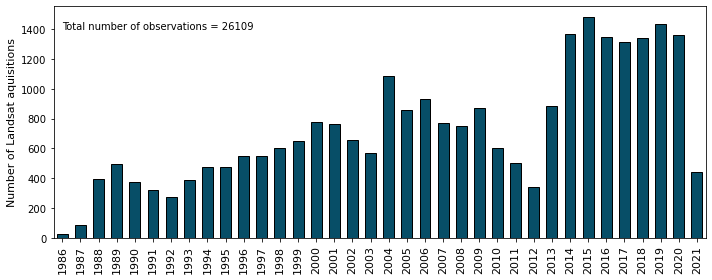

In [247]:
fig, ax = plt.subplots(figsize=(10, 4))
#fig, axes = plt.subplots(2, 3, figsize=(7, 5))
ax.bar(x=noa_df.index, height=noa_df["NOA"], color="#074e67", edgecolor="black", width=0.6)
ax.set_xticks(noa_df.index)
ax.margins(x=0.005)
ax.set_xticklabels(noa_df.index, rotation=90, fontsize=11)
ax.set_ylabel("Number of Landsat aquisitions", fontsize=11)
#patch = mpatches.Patch(label="All observations = "+str(np.sum(noa_df.NOA)))
#ax.legend(handles=[patch])
ax.text(1986,1400,"Total number of observations = "+str(np.sum(noa_df.NOA)))
fig.tight_layout()
fig.savefig(os.path.join(plot_dir,"Landsat_observations"), dpi=500)
#plt.close(fig)